In [1]:
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt
import scipy.integrate as quad
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import random

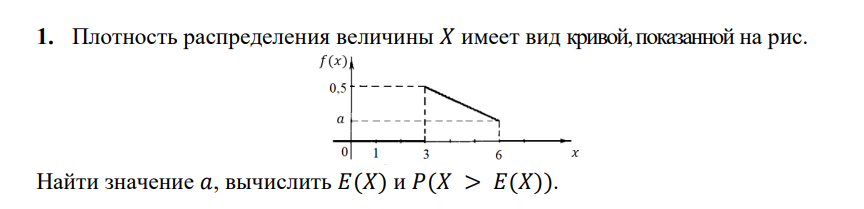

In [2]:
a, x = sp.symbols('a x')

In [12]:
f = sp.Piecewise(((x - 3) * (a- 1/2) / 3 + 1/2, (x <= 6) & (x >= 3)), (0, True))
f

Piecewise(((a - 0.5)*(x - 3)/3 + 0.5, (x >= 3) & (x <= 6)), (0, True))

In [13]:
integral = sp.integrate(f, (x, -sp.oo, sp.oo))
integral

1.5*a + 0.75

In [14]:
a0 = sp.solve(integral - 1, a)
a0 = a0[0]
a0

0.166666666666667

In [15]:
f = f.subs(a, a0)
f

Piecewise((0.833333333333333 - 0.111111111111111*x, (x >= 3) & (x <= 6)), (0, True))

In [16]:
sp.integrate(f, (x, -sp.oo, sp.oo))

1.00000000000000

In [17]:
# Константу a нашли

In [22]:
class rv_continuous_f(sts.rv_continuous):
    def _pdf(self, x):
        pdf_values = np.zeros_like(x)
        pdf_values = np.where((3 <= x) & (x <= 6), 0.833333333333333 - 0.111111111111111*x, 0)
        return pdf_values

In [23]:
X = rv_continuous_f(a = 3, b = 6)

In [24]:
133/288

0.4618055555555556

In [25]:
1 - X.cdf(X.mean())

0.4618055555555486

In [26]:
X.sf(X.mean())

0.4618055555555486

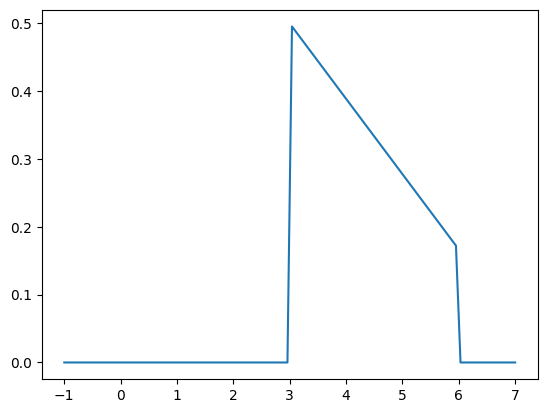

In [27]:
x = np.linspace(-1, 7, 100)
y = X.pdf(x)
plt.plot(x, y)

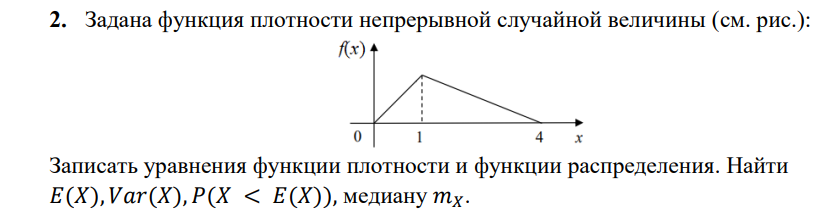

In [28]:
# Посчитали, что a = 1/2 (площадь треугольников в сумме = 1)

In [29]:
# Пишем уравнения ибучих прямых

In [47]:
class rv_continuous_f(sts.rv_continuous):
    def _pdf(self, x):
        pdf_values = np.zeros_like(x)
        pdf_values = np.where((0 <= x) & (x <= 1), x/2, pdf_values)
        pdf_values = np.where((1 <= x) & (x <= 4), -1/6 * x + 2/3, pdf_values)
        return pdf_values

In [48]:
X = rv_continuous_f(a = 0, b = 4)

In [49]:
X.mean()

1.6666666655696798

In [50]:
X.var()

0.7222222277864114

In [51]:
X.cdf(X.mean())

0.5462962958694163

In [53]:
X.ppf(1/2)

1.5505102562696105

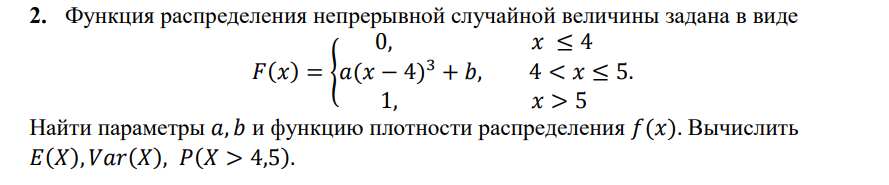

In [85]:
class rv_continuous_f(sts.rv_continuous):
    def _pdf(self, x):
        pdf_values = np.zeros_like(x)
        pdf_values = np.where((x <= 4), 0, pdf_values)
        pdf_values = np.where((4 <= x) & (x <= 5), (x - 4) ** 3, pdf_values)
        pdf_values = np.where((x >= 5), 1, pdf_values)
        return pdf_values

In [86]:
X = rv_continuous_f(a = -1000, b = 1000)

In [87]:
X.cdf(4.5)

0.0

In [88]:
1 - X.pdf(4.5) - X.cdf(4.5)

0.875